## Deep Learning and Computer Vision

### Encoder-Decoder - Transposed Convolutions

Shani Israelov

Jean Monnet University, 2023

The aim of this exercise is to code a convolution auto-encoder to create digit images.
You will use the MNIST dataset.

1/ Create and train a simple convolutional auto-encoder with :
- 3 encoding convolutional layers with max pooling after the two first conv. layers
- 1 dense layer (embedding space)
- 1 dense layer (49 neurons)
- Reshape (7 x7)
- 3 decoding transposed convolutional layers (use "strides" for upsampling)
- 1 convolutional layer (sigmoid function as activation)
The loss function is the mean square error between the input and the output (0.01 would be not too
bad for the validation set).

In [3]:
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import adam_v2
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

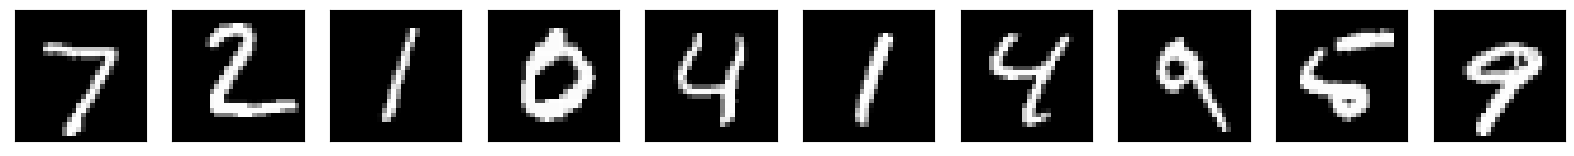

In [4]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
x_train.shape

In [ ]:
# Normalize
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [7]:

model = Sequential([
    # Encoding
    Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size = (2, 2), padding='same'),
    Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size = (2, 2), padding='same'),
    Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size = (2, 2), padding='same'),
    # Decoding
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])


SyntaxError: positional argument follows keyword argument (1458337972.py, line 17)

In [ ]:
# Declare the model
model.compile(loss = 'mse',
              optimizer = adam_v2.Adam()
             )

In [ ]:
# Train the model
model.fit(x_train, x_train,
                epochs=5,
                batch_size=16,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test)
               )

2/ Observe the quality of the output for some test images.


In [ ]:
decoded_imgs = model.predict(x_test)

In [ ]:

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

3/ Encode two images from two different digits. Compute the average of two 49-D vectors in the
latent space. Decode this average. Compare with the average of the two decoded images.

4/ Transform your auto-encoder into a denoising network.

In [ ]:
# noise_factor = 0.5
# X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0,
# scale=1.0, size=X_train.shape)
# X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0,
# scale=1.0, size=X_test.shape)
# X_train_noisy = np.clip(X_train_noisy, 0., 1.)
# X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#### References: 
[1] https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763
